In [1]:
%pip install pandas
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact

In [3]:

dbPath = "./database/QM9_deepchem/qm9.csv"
df = pd.read_csv(dbPath)
tasks = ['A','B','C','mu','alpha','homo','lumo','gap','r2','zpve','u0','u298','h298','g298','cv','u0_atom','u298_atom','h298_atom','g298_atom']
columns = ['Task','Mean','Standard deviation', 'Mean absolute deviation','ratio']

In [4]:
mean_list = []
sd_list = []
mad_list = []
ratio_list = []
for task in tasks:
    mean = df[task].mean()
    mean_list.append(mean)
    std = df[task].std()
    sd_list.append(std)
    mad = np.mean(np.abs(df[task] - df[task].mean()))
    mad_list.append(mad)
    ratio_list.append(std/mad)

In [5]:
list_of_tuples = list(zip(tasks, mean_list, sd_list, mad_list, ratio_list))
stats  = pd.DataFrame(list_of_tuples, columns = columns)
print(stats)

         Task         Mean  Standard deviation  Mean absolute deviation  \
0           A     9.814382         1809.465666                12.829014   
1           B     1.406097            1.583795                 0.350431   
2           C     1.124921            1.095618                 0.248505   
3          mu     2.706037            1.530394                 1.189455   
4       alpha    75.191296            8.187793                 6.300305   
5        homo    -0.239977            0.022131                 0.016290   
6        lumo     0.011124            0.046936                 0.038653   
7         gap     0.251100            0.047519                 0.039657   
8          r2  1189.527450          279.757172               202.038617   
9        zpve     0.148524            0.033274                 0.026451   
10         u0  -411.543985           40.060230                31.081635   
11       u298  -411.535513           40.060012                31.081502   
12       h298  -411.53456

In [6]:
np.set_printoptions(precision=3, suppress=True)

def show_dataset(index):
    print('index={}, SMILES={}'.format(index, dataset_smiles[index]))
    atom, adj, labels = dataset[index]
    print('atom', atom)
    # print('adj', adj)
    print('labels', labels)
    mol = Chem.MolFromSmiles(dataset_smiles[index])
    return render_svg(moltosvg(mol))

interact(show_dataset, index=(0, len(dataset) - 1, 1))

NameError: name 'dataset' is not defined

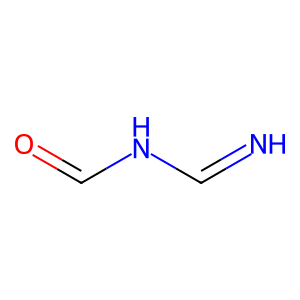

: 

In [12]:
dataset = np.asarray(df['smiles'])

index = 111

mol = Chem.MolFromSmiles(dataset[index])

display(Draw.MolToImage(mol))